In [63]:
import numpy as np
import pandas as pd
data = pd.read_csv('./data/data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
id                                       30469 non-null int64
full_sq                                  30469 non-null int64
life_sq                                  24086 non-null float64
floor                                    30302 non-null float64
sub_area                                 30469 non-null object
preschool_quota                          23781 non-null float64
preschool_education_centers_raion        30469 non-null int64
school_quota                             23784 non-null float64
school_education_centers_raion           30469 non-null int64
school_education_centers_top_20_raion    30469 non-null int64
hospital_beds_raion                      16029 non-null float64
healthcare_centers_raion                 30469 non-null int64
university_top_20_raion                  30469 non-null int64
sport_objects_raion                      30469 non-null int64
additional_e

In [66]:
data.dropna().count()

id                                       13652
full_sq                                  13652
life_sq                                  13652
floor                                    13652
sub_area                                 13652
preschool_quota                          13652
preschool_education_centers_raion        13652
school_quota                             13652
school_education_centers_raion           13652
school_education_centers_top_20_raion    13652
hospital_beds_raion                      13652
healthcare_centers_raion                 13652
university_top_20_raion                  13652
sport_objects_raion                      13652
additional_education_raion               13652
culture_objects_top_25_raion             13652
shopping_centers_raion                   13652
office_raion                             13652
metro_min_avto                           13652
metro_km_avto                            13652
metro_min_walk                           13652
metro_km_walk

In [67]:
data.ecology.value_counts()

poor            8017
no data         7656
good            7173
excellent       3938
satisfactory    3685
Name: ecology, dtype: int64

In [74]:
ecology_dict = {'no data': 0, 'poor': 1, 'satisfactory': 2, 'good': 3, 'excellent': 4}
data.ecology = data.ecology.replace(to_replace=ecology_dict)
data.ecology

0        3
1        4
2        1
3        3
4        4
5        1
6        1
7        3
8        1
9        2
10       3
11       2
12       2
13       1
14       1
15       4
16       1
17       1
18       3
19       3
20       0
21       1
22       2
23       1
24       2
25       2
26       3
27       3
28       1
29       3
        ..
30439    4
30440    0
30441    3
30442    3
30443    2
30444    0
30445    3
30446    0
30447    2
30448    3
30449    0
30450    2
30451    3
30452    1
30453    0
30454    3
30455    3
30456    0
30457    3
30458    3
30459    2
30460    2
30461    2
30462    1
30463    4
30464    3
30465    1
30466    0
30467    2
30468    1
Name: ecology, Length: 30469, dtype: object

In [83]:
round(data.ecology.mean(), 2)

1.73

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
id                                       30469 non-null int64
full_sq                                  30469 non-null int64
life_sq                                  24086 non-null float64
floor                                    30302 non-null float64
sub_area                                 30469 non-null object
preschool_quota                          23781 non-null float64
preschool_education_centers_raion        30469 non-null int64
school_quota                             23784 non-null float64
school_education_centers_raion           30469 non-null int64
school_education_centers_top_20_raion    30469 non-null int64
hospital_beds_raion                      16029 non-null float64
healthcare_centers_raion                 30469 non-null int64
university_top_20_raion                  30469 non-null int64
sport_objects_raion                      30469 non-null int64
additional_e

In [112]:
dummies = pd.get_dummies(data.sub_area)
data_with_dummies = pd.concat([data.drop('sub_area', 1), dummies], axis=1)
data_with_dummies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Columns: 201 entries, id to Zjuzino
dtypes: float64(41), int64(13), object(1), uint8(146)
memory usage: 17.0+ MB


In [111]:
41+13+1+146

201

In [136]:
import numpy as np
import pandas as pd
vis_data = pd.read_csv("./data/train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
ticket_id                     250306 non-null int64
agency_name                   250306 non-null object
inspector_name                250306 non-null object
violator_name                 250272 non-null object
violation_street_number       250306 non-null float64
violation_street_name         250306 non-null object
violation_zip_code            0 non-null float64
mailing_address_str_number    246704 non-null float64
mailing_address_str_name      250302 non-null object
city                          250306 non-null object
state                         250213 non-null object
zip_code                      250305 non-null object
non_us_str_code               3 non-null object
country                       250306 non-null object
ticket_issued_date            250306 non-null object
hearing_date                  237815 non-null object
violation_code                250306 non-null obj

In [48]:
# vis_data['balance_due']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
round(scaler.fit_transform(vis_data[['balance_due']]).min(),5)

-13.14733

In [52]:
%matplotlib inline
np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).hist()

17.011653135633672

In [57]:
balance_due_sqrt = np.sqrt(vis_data.balance_due[vis_data.balance_due > 0])
abs(balance_due_sqrt.mean() - balance_due_sqrt.median())

0.4525960609393067

In [159]:
%matplotlib inline
balance_due = vis_data[['balance_due']]
balance_due.count()
rows_to_drop = vis_data[ vis_data['balance_due'] == 0 ].index
balance_due = balance_due.drop(rows_to_drop)
balance_due.count()

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    print(quartile_1, quartile_3)
    iqr = quartile_3 - quartile_1
    k = 1.5
    lower_bound = quartile_1 - (iqr * k)
    upper_bound = quartile_3 + (iqr * k)
    print(lower_bound, upper_bound)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]
outliers_idx = outliers_iqr(balance_due)
# balance_due.min()
# balance_due.iloc[outliers_idx]
# outliers_idx
outliers = balance_due.iloc[outliers_idx]
{'min': outliers.min(), 'max': outliers.max(), 'max - min': outliers.max() - outliers.min()}
# .iloc(outliers_idx)
# balance_due[outliers_idx]
# { 'outliers': outliers, 'max': outliers.max(), 'min': outliers.min(), 'max - min': outliers.max() - outliers.min()  }


140.0 305.0
-107.5 552.5


{'min': balance_due   -7750.0
 dtype: float64, 'max': balance_due    11030.0
 dtype: float64, 'max - min': balance_due    18780.0
 dtype: float64}

In [40]:
vis_data['state'].value_counts().index[0]


'MI'

In [41]:
#result = vis_data['state'].fill_na(value='MI')
result = vis_data['state'].fillna(value=vis_data['state'].value_counts().index[0])
result.value_counts()

MI    228694
CA      5020
TX      2420
FL      2237
IL      1310
SC      1304
OH       967
NY       673
MN       632
GA       535
NV       484
UT       477
PA       466
NJ       395
VA       385
NC       353
MD       349
AZ       329
ME       261
OK       248
AL       215
TN       207
WA       192
MA       182
IA       159
WI       159
OR       153
MO       151
CO       147
KY       146
IN       106
AR        82
LA        81
AK        79
UK        77
NB        77
MS        64
CT        60
DC        58
ON        51
DE        50
KS        37
RI        35
SD        33
ID        33
MT        28
NM        21
BC        17
WY        12
HI        10
NH         9
VT         7
WV         6
VI         6
QC         5
PR         5
QL         3
ND         2
BL         2
Name: state, dtype: int64

In [17]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(vis_data[['balance_due', 'discount_amount']])
poly_features.mean(axis=0)

array([ 1.00000000e+00,  2.22449058e+02,  1.25166796e-01,  4.17195810e+05,
       -9.85531709e+00,  1.17817392e+01,  2.04200098e+09,  1.17924384e+05,
       -1.49564074e+02,  3.07417605e+03])

In [26]:
# vis_data['ticket_issued_date'].dt.is_weekend()
datetime_vals = pd.to_datetime(vis_data.ticket_issued_date.dropna())
vis_data['is_weekend'] = datetime_vals.dt.weekday > 4
vis_data[vis_data['is_weekend']].count()

ticket_id                     1620
agency_name                   1620
inspector_name                1620
violator_name                 1620
violation_street_number       1620
violation_street_name         1620
violation_zip_code               0
mailing_address_str_number    1617
mailing_address_str_name      1620
city                          1620
state                         1620
zip_code                      1620
non_us_str_code                  0
country                       1620
ticket_issued_date            1620
hearing_date                  1586
violation_code                1620
violation_description         1620
disposition                   1620
fine_amount                   1620
admin_fee                     1620
state_fee                     1620
late_fee                      1620
discount_amount               1620
clean_up_cost                 1620
judgment_amount               1620
payment_amount                1620
balance_due                   1620
payment_date        

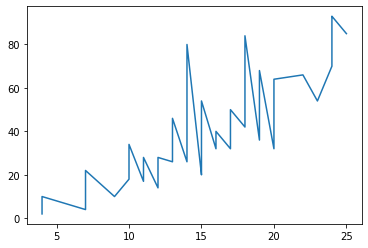

In [165]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
myData = pd.read_csv('./data/mycar.csv')
X = myData.iloc[:,:-1].values
Y = myData.iloc[:,1].values
# myData.head()
plt.plot(X, Y)

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3)
from sklearn.linear_model import LinearRegression
myModel = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
myModel.fit(X_train,Y_train) #обучаем модель на обучающих данных
y_pred = myModel.predict(X_test)
from sklearn import metrics 
MSE = metrics.mean_squared_error(Y_test, y_pred)
MSE


189.70247708807722

In [174]:
R_2 = metrics.r2_score(Y_test, y_pred)
R_2

0.6658965093475164

In [179]:
pred = [1, 3, 2, 5]
test = [2, 3, -1, 4]
MSE = metrics.mean_squared_error(test, pred)
R_2 = metrics.r2_score(test, pred)
[MSE, R_2]

[2.75, 0.2142857142857143]